In [ ]:
! pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd , numpy as np , datetime, os
import seaborn as sns,  matplotlib.pyplot as plt, joblib as jlib

import tensorflow as tf, keras_tuner, tensorflow.keras as keras, tensorflow.keras.layers as layers
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
! pip install pandas seaborn matplotlib scikit-learn keras-tuner
! python3 -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
#Check the version of TensorFlow you are using
print(tf.__version__)
print(">>> CPU Info:" , "\n", tf.config.list_physical_devices('CPU'), "\n")
print(">>> GPU Info:" , "\n", tf.config.list_physical_devices('GPU'), "\n")
print(">>> TPU Info:" , "\n", tf.config.list_physical_devices('TPU'))

2.15.0
>>> CPU Info: 
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] 

>>> GPU Info: 
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 

>>> TPU Info: 
 []


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path = '/content/drive/MyDrive/insurance.csv'
df = pd.read_csv(path)

In [ ]:
df = pd.read_csv(path)
df.drop('index', axis=1, inplace=True)
print('>> SHAPE: ', df.shape)
df.head()

>> SHAPE:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


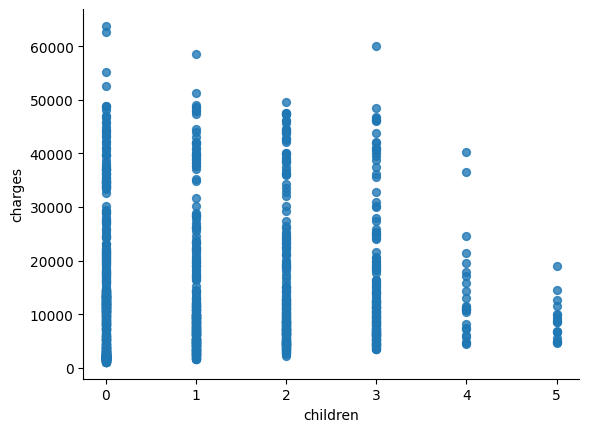

In [ ]:
# @title children vs charges

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
plt.scatter(df['children'], df['charges'])
plt.show()

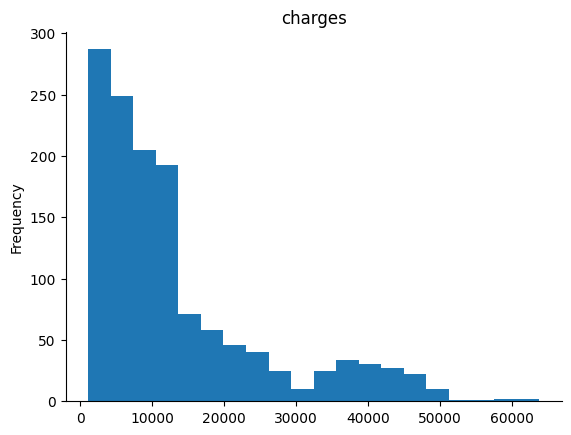

In [ ]:
# @title charges

from matplotlib import pyplot as plt
df['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

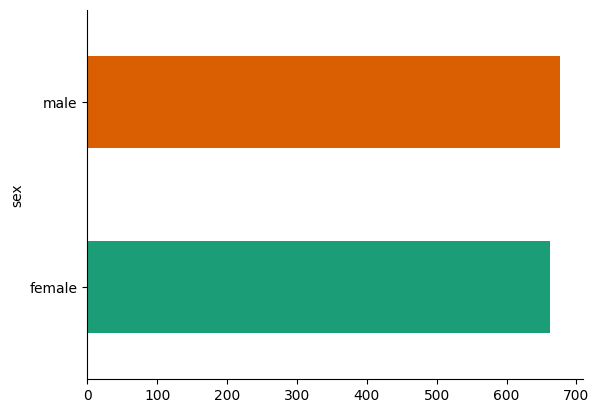

In [ ]:
# @title sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

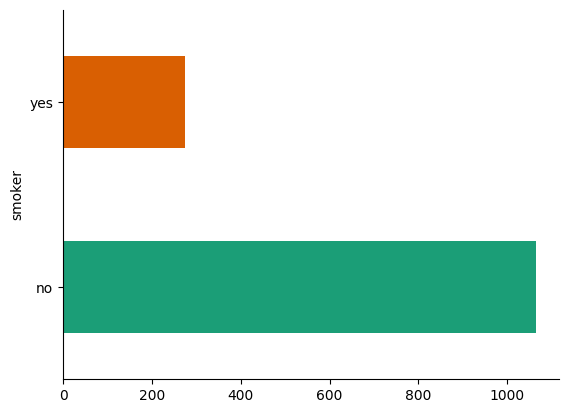

In [ ]:
# @title smoker

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

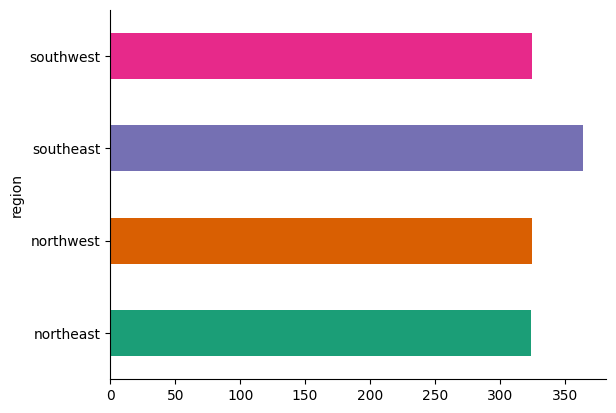

In [ ]:
# @title region

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

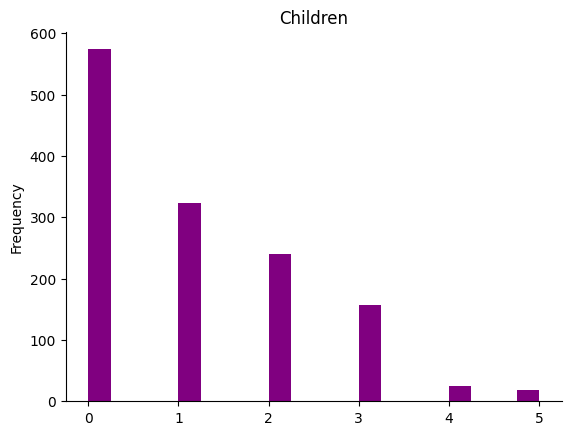

In [ ]:

df['children'].plot(kind='hist', bins=20, title='Children', color='purple')
plt.gca().spines[['top', 'right',]].set_visible(False)

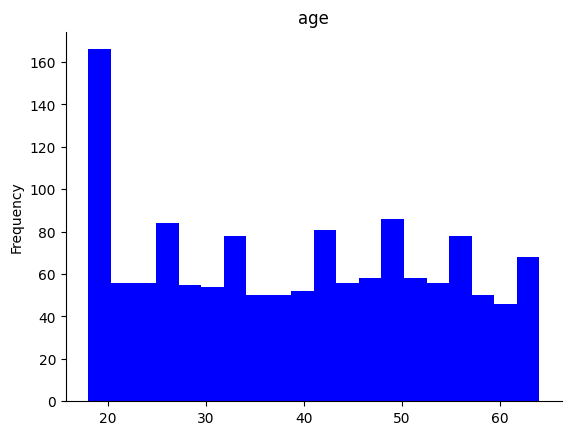

In [ ]:
df['age'].plot(kind='hist', bins=20, title='age', color ='blue')
plt.gca().spines[['top', 'right',]].set_visible(False)

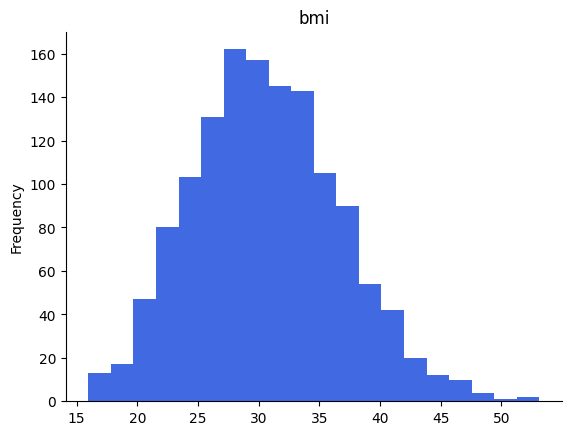

In [ ]:
df['bmi'].plot(kind='hist', bins=20, title='bmi', color='royalblue')
plt.gca().spines[['top', 'right',]].set_visible(False)

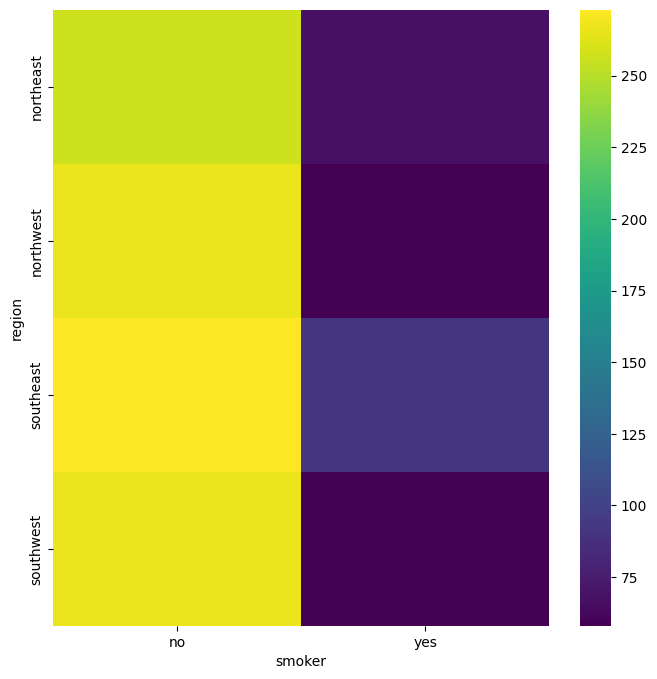

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in df.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')